This notebook was prepared by [Alain Ivars](http://highfeature.com). Source and license info is on [GitHub]
(https://github.com/alainivars/data-science-notebooks)

# Kaggle Competition: Titanic: Machine Learning from Disaster

## Introduction

* First a big Thanks to [Harrison Sentdex](http://pythonprogramming.net) for the Free Machine learning course online.
* An other very important thing for me; if you know some way to get the same result of a block, dont hesitate to let me know, by submit a poll request on Github, any share is very wellcome, Thanks.

* Competition Site
* Competition Description
* More informations
* Setup Imports and Variables
* Explore the Data
* Feature: Passenger Classes
* Feature: Sex
* Feature: Embarked
* Feature: Age
* Feature: Family Size
* Final Data Preparation for Machine Learning
* Data Wrangling Summary
* Random Forest: Training
* Random Forest: Predicting
* Random Forest: Prepare for Kaggle Submission
* Support Vector Machine: Training
* Support Vector Machine: Predicting

## Competition Site

More information about the chalenge [here!](https://www.kaggle.com/c/titanic)

## Competition Description

![alt text](http://free.bridal-shower-themes.com/img/p/r/printable-pictures-of-the-titanic_1.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## More informations

For more informations about the chalenge, [its evaluation](https://www.kaggle.com/c/titanic#evaluation) and download go [here!](https://www.kaggle.com/c/titanic/data)

## Setup Imports and Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def figure_size_small():
    """Set the size of matplotlib figures"""
    plt.rc('figure', figsize=(10, 5))

def figure_size_big():
    """Set the global default size of matplotlib figures"""
    plt.rc('figure', figsize=(15, 10))

# Set the global default size of matplotlib figures
figure_size_small()

# graph type
kind_type = ['bar', 'barh', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie']


## Explore the Data to find a strategy

### Load data and view some statistics and certainly also missing data

In [3]:
'''Read the data:'''
df_train = pd.read_csv('data/Kaggle_PredictingTitanicSurvivors/train.csv')

Data are now loaded in pandas DataFrame. First see what kind of data we have

In [4]:
'''View the data types of each column:'''
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Well numeric in big part, but some in other format and from what I know of "deep learning", it like  only digital data. If you know some liking no-digital format link it me please.
What are inside?

In [5]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Data missing for :


In [6]:
(df_train.count()['PassengerId'] - df_train.count()['Age'], "Age", 
df_train.count()['PassengerId'] - df_train.count()['Cabin'], "Cabin", 
df_train.count()['PassengerId'] - df_train.count()['Embarked'], "Embarked")

(177, 'Age', 687, 'Cabin', 2, 'Embarked')

Some missing data certainly visible in the head

In [7]:
'''Head data (first 5 records)'''
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Yes in 'Cabin', now we look in the tail

In [8]:
'''tail data (last 5 records)'''
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


And here in 'Age' also.

Well, some label (field) will not be useful to try to discover who will survive, like:
- PassagerId
- Name

and certainly 
- Embarked
- Cabin : because right now we dont have the cabin map of the boat

For all other, we should verify they coerences

### Replace Nan and empty value with some more usefull value for statistic

In [9]:
'''replace Age = Nan by, Age = 130'''
df_train['Age'] = df_train['Age'].fillna(np.float64(130))
'''replace Cabin empty by, Cabin = Alpha'''
df_train['Cabin'] = df_train['Cabin'].fillna('Alpha')

In [10]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       889
dtype: int64

### Now let go to verify some intuitions

#### Survived by Class

In [11]:
crosstab_pclass_survived = pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index')
crosstab_pclass_survived

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


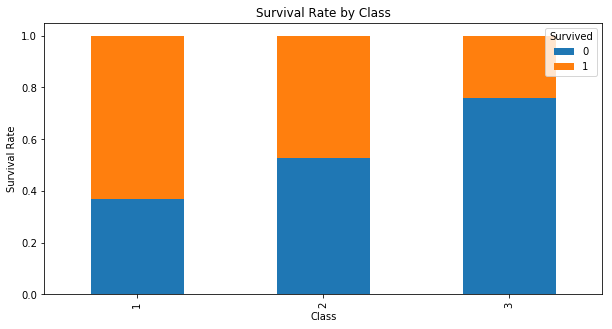

In [12]:
figure_size_small()
kind=kind_type[0]
crosstab_pclass_survived.plot(kind=kind, stacked=True)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

Obviously, the best class to survive is in order: first, second and third.

#### Survived by Cabin

Let us now see if 'Cabin' with the data we have (no plan of cabits on the steamer), teaches us something exploitable:

In [13]:
kind=kind_type[0]
df_crosstab = pd.crosstab(df_train['Cabin'], df_train['Survived'])
df_crosstab
# df_crosstab.plot(kind=kind, stacked=True)
# plt.show()

Survived,0,1
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
A23,0,1
A24,1,0
A26,0,1
A31,0,1


Nothing is obvious, except the 'cabin' Alpha (passenger without cabin) which at a general rate of survival of 2 out of 5.

#### Age by Class

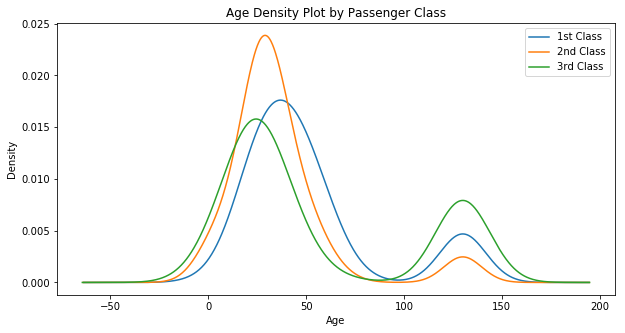

In [14]:
kind=kind_type[3]
class_list = sorted(df_train['Pclass'].unique())
for pclass in class_list:
    df_train.Age[df_train.Pclass == pclass].plot(kind=kind)
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

Also obvious, third class is the younger, follow by second and first class are the older

#### Survived by Class and Age

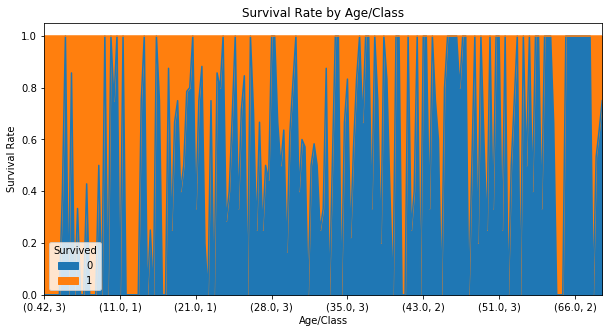

In [15]:
kind=kind_type[4]
df_train_norm1 = pd.crosstab([df_train['Age'],df_train['Pclass']], df_train['Survived'], normalize='index')
df_train_norm1.plot(kind=kind, stacked=True)
plt.title('Survival Rate by Age/Class')
plt.xlabel('Age/Class')
plt.ylabel('Survival Rate')
plt.show()

Here nothing clear, let's try another point of view.

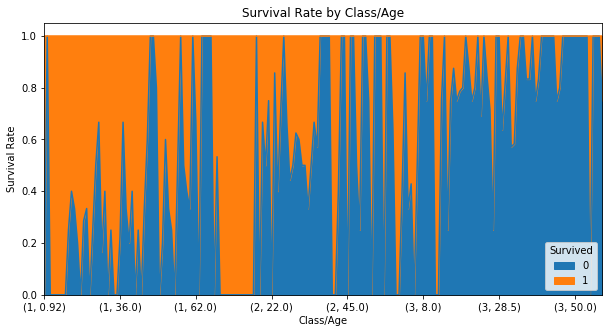

In [16]:
#kind_type = ['bar', 'barh', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie']
kind=kind_type[4]
df_train_norm1 = pd.crosstab([df_train['Pclass'],df_train['Age']], df_train['Survived'], normalize='index')
df_train_norm1.plot(kind=kind, stacked=True)
plt.title('Survival Rate by Class/Age')
plt.xlabel('Class/Age')
plt.ylabel('Survival Rate')
plt.show()

Not bad, but nothing very clear, let's try another point of view.

#### Survived by Gender, Class and Age

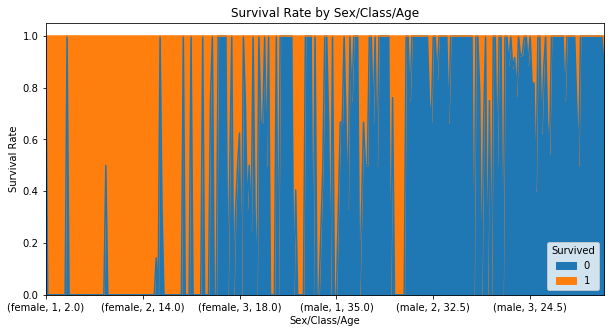

In [17]:
kind=kind_type[4]
df_train_norm1 = pd.crosstab([df_train['Sex'],df_train['Pclass'],df_train['Age']], df_train['Survived'], normalize='index')
df_train_norm1.plot(kind=kind, stacked=True)
plt.title('Survival Rate by Sex/Class/Age')
plt.xlabel('Sex/Class/Age')
plt.ylabel('Survival Rate')
plt.show()

The graph is much clearer, it was better to be young, female and first class to survive.

Let's try to confirm this with other graphs

In [18]:
ranges_age = [
    0, 5, 10, 15,   # childs
    25, 35, 45, 55,  # Adult
    65, 70, 80, 120,  # Older
    600]  # unknow Age
group_by_age = pd.cut(df_train["Age"], ranges_age)
#group_by_age

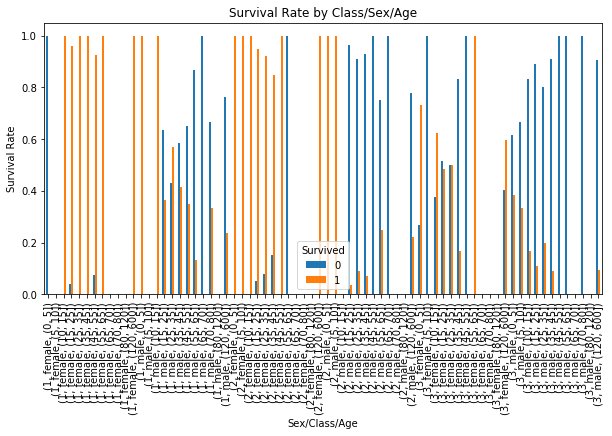

In [19]:
kind=kind_type[0]
df_train_norm1 = pd.crosstab([df_train['Pclass'],df_train['Sex'],group_by_age], df_train['Survived'], normalize='index')
df_train_norm1.plot(kind=kind, stacked=False)
plt.title('Survival Rate by Class/Sex/Age')
plt.xlabel('Sex/Class/Age')
plt.ylabel('Survival Rate')
plt.show()

In [20]:
Not bad but still missing some things

SyntaxError: invalid syntax (<ipython-input-20-a65bdbc30567>, line 1)

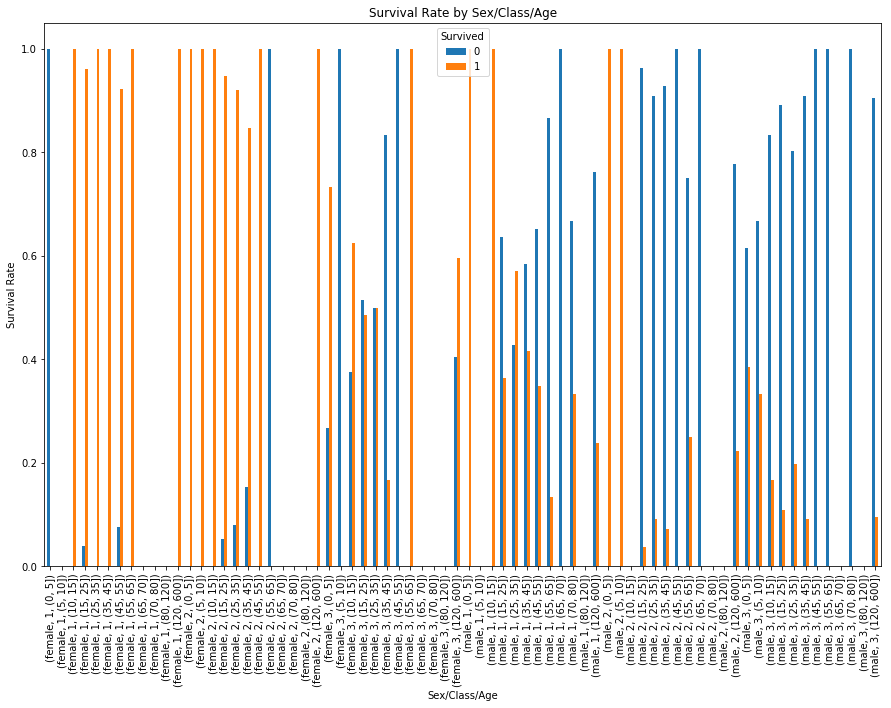

In [21]:
figure_size_big()
kind=kind_type[0]
df_train_norm1 = pd.crosstab([df_train['Sex'],df_train['Pclass'],group_by_age], df_train['Survived'], normalize='index')
df_train_norm1.plot(kind=kind, stacked=False)
plt.title('Survival Rate by Sex/Class/Age')
plt.xlabel('Sex/Class/Age')
plt.ylabel('Survival Rate')
plt.show()

This is now confirming, with one exception however the third class males have a higher survival rate than those of 2nd class. There is certainly a lack of data sources such as bridges and access plans to better understand this exception.

#### Draft unsorted of analyses

In [22]:
pd.crosstab([df_train['Sex'],df_train['Pclass'],group_by_age], df_train['Survived'], normalize='index')

Survived                         0         1
Sex    Pclass Age                           
female 1      (0, 5]      1.000000  0.000000
              (5, 10]     0.000000  0.000000
              (10, 15]    0.000000  1.000000
              (15, 25]    0.040000  0.960000
              (25, 35]    0.000000  1.000000
              (35, 45]    0.000000  1.000000
              (45, 55]    0.076923  0.923077
              (55, 65]    0.000000  1.000000
              (65, 70]    0.000000  0.000000
              (70, 80]    0.000000  0.000000
              (80, 120]   0.000000  0.000000
              (120, 600]  0.000000  1.000000
       2      (0, 5]      0.000000  1.000000
              (5, 10]     0.000000  1.000000
              (10, 15]    0.000000  1.000000
              (15, 25]    0.052632  0.947368
              (25, 35]    0.080000  0.920000
              (35, 45]    0.153846  0.846154
              (45, 55]    0.000000  1.000000
              (55, 65]    1.000000  0.000000
              (65, 70]    0.000000  0.000000
              (70, 80]    0.000000  0.000000
              (80, 120]   0.000000  0.000000
              (120, 600]  0.000000  1.000000
       3      (0, 5]      0.266667  0.733333
              (5, 10]     1.000000  0.000000
              (10, 15]    0.375000  0.625000
              (15, 25]    0.514286  0.485714
              (25, 35]    0.500000  0.500000
              (35, 45]    0.833333  0.166667
...                            ...       ...
male   1      (45, 55]    0.652174  0.347826
              (55, 65]    0.866667  0.133333
              (65, 70]    1.000000  0.000000
              (70, 80]    0.666667  0.333333
              (80, 120]   0.000000  0.000000
              (120, 600]  0.761905  0.238095
       2      (0, 5]      0.000000  1.000000
              (5, 10]     0.000000  1.000000
              (10, 15]    0.000000  0.000000
              (15, 25]    0.962963  0.037037
              (25, 35]    0.909091  0.090909
              (35, 45]    0.928571  0.071429
              (45, 55]    1.000000  0.000000
              (55, 65]    0.750000  0.250000
              (65, 70]    1.000000  0.000000
              (70, 80]    0.000000  0.000000
              (80, 120]   0.000000  0.000000
              (120, 600]  0.777778  0.222222
       3      (0, 5]      0.615385  0.384615
              (5, 10]     0.666667  0.333333
              (10, 15]    0.833333  0.166667
              (15, 25]    0.891089  0.108911
              (25, 35]    0.802632  0.197368
              (35, 45]    0.909091  0.090909
              (45, 55]    1.000000  0.000000
              (55, 65]    1.000000  0.000000
              (65, 70]    0.000000  0.000000
              (70, 80]    1.000000  0.000000
              (80, 120]   0.000000  0.000000
              (120, 600]  0.904255  0.095745

[72 rows x 2 columns]

In [23]:
ranges_age = [
    0, 5, 10, 15,   # childs
    25, 35, 45, 55,  # Adult
    65, 70, 80, 120,  # Older
    600]  # unknow Age
group_by_age = pd.cut(df_train["Age"], ranges_age)
# group_by_age
# age_grouping = df_train.groupby(group_by_age).mean()
# age_grouping['Survived'].plot.bar()
# plt.show()
data_fit = pd.crosstab(
    index=[
        df_train['Sex'],
        df_train['Pclass'],
        group_by_age
    ],
    columns=df_train['Survived'],
    rownames=['Sex', 'Pclass', 'Age'],
    colnames=['Survived'],
    normalize='index'
)
print(data_fit)

Survived                         0         1
Sex    Pclass Age                           
female 1      (0, 5]      1.000000  0.000000
              (5, 10]     0.000000  0.000000
              (10, 15]    0.000000  1.000000
              (15, 25]    0.040000  0.960000
              (25, 35]    0.000000  1.000000
              (35, 45]    0.000000  1.000000
              (45, 55]    0.076923  0.923077
              (55, 65]    0.000000  1.000000
              (65, 70]    0.000000  0.000000
              (70, 80]    0.000000  0.000000
              (80, 120]   0.000000  0.000000
              (120, 600]  0.000000  1.000000
       2      (0, 5]      0.000000  1.000000
              (5, 10]     0.000000  1.000000
              (10, 15]    0.000000  1.000000
              (15, 25]    0.052632  0.947368
              (25, 35]    0.080000  0.920000
              (35, 45]    0.153846  0.846154
              (45, 55]    0.000000  1.000000
              (55, 65]    1.000000  0.000000
          

In [24]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
total = df_train['Survived'].value_counts()
dead = total[0] / (total[0] + total[1])
survived = total[1] / (total[0] + total[1])
survived, dead

(0.38383838383838381, 0.61616161616161613)